*import libraries*

In [92]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score,ConfusionMatrixDisplay

## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with pandas 

 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [38]:
df = pd.read_csv('./Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


- Let's see exact column names that have in the dataset
  
 *` Not enough, let's have a look on the columns and their data types using detailed info function`*

In [39]:
df.columns


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10000 rows and 14 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.


In [41]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [42]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
df.duplicated().sum()

0

In [44]:
df.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace = True, errors = 'ignore' )
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Observation
---
- Our data is cleaned from missing values and duplicates values 
- Now let's see the value counts of the gender column and geography

In [45]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [46]:
df[['Gender', 'Geography']].value_counts()

Gender  Geography
Male    France       2753
Female  France       2261
Male    Spain        1388
        Germany      1316
Female  Germany      1193
        Spain        1089
dtype: int64

## Observation
---
- Now we clearly know about **Geography** and **Gender** 
- Let's check the distribution of data using plots 

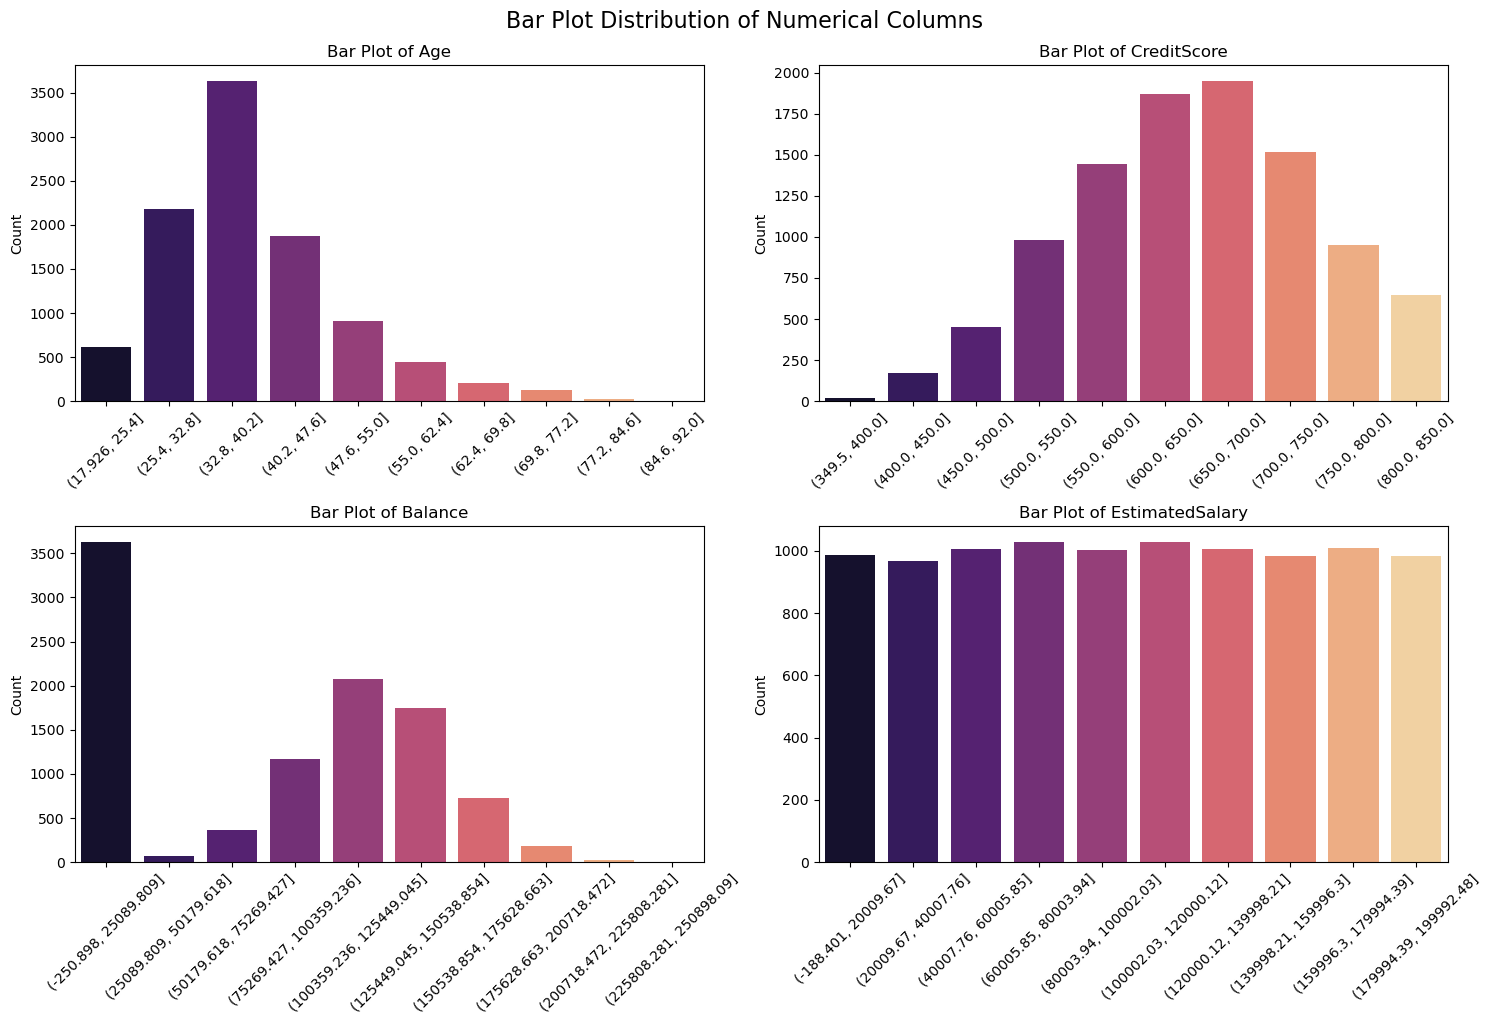

In [47]:
# Numerical columns to bin
cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cols):
    plt.subplot(2, 2, i + 1)
    # Create bins for the numerical column
    binned = pd.cut(df[col], bins=10)
    sns.countplot(x=binned, palette='magma')
    plt.xticks(rotation=45)
    plt.title(f'Bar Plot of {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.tight_layout()

plt.suptitle("Bar Plot Distribution of Numerical Columns", fontsize=16, y=1.02)
plt.show()

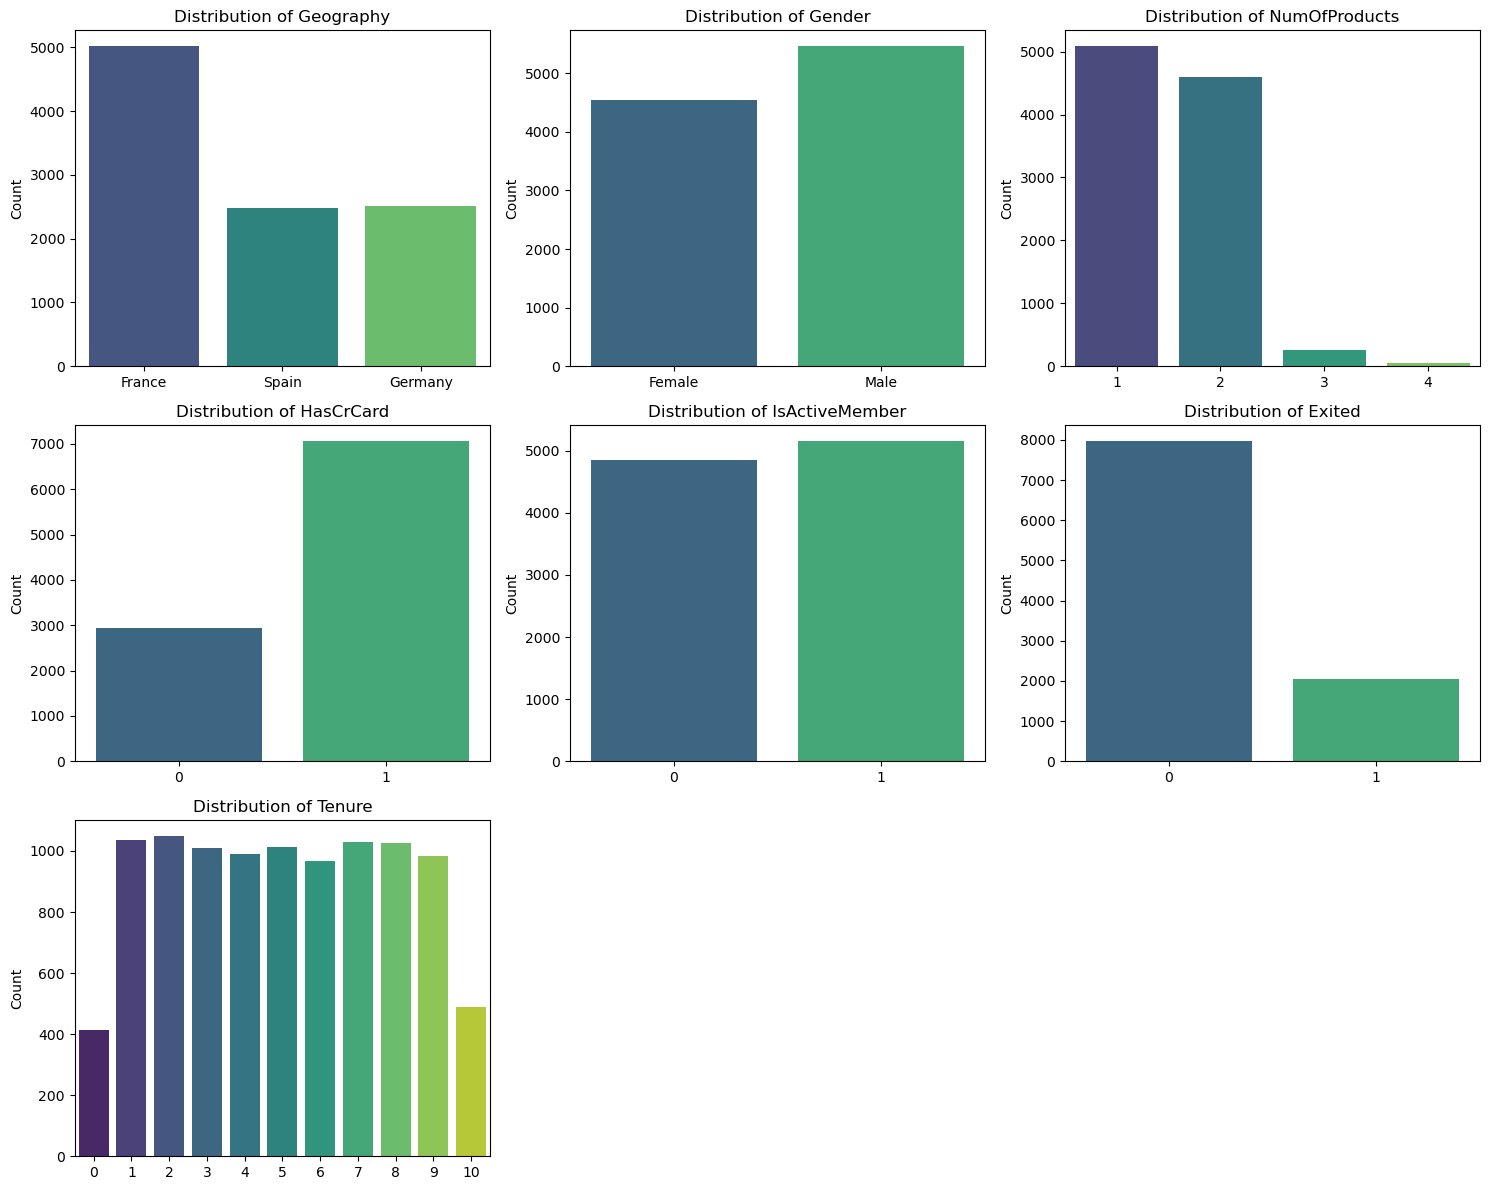

In [48]:
cols = ['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 
        'IsActiveMember', 'Exited', 'Tenure']

plt.figure(figsize=(15, 12))

for i, col in enumerate(cols):
    plt.subplot(3, 3, i + 1)  # 3 rows, 3 columns grid
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.tight_layout()

## Observation
---
- Now we clearly see the distribution of dataset 

- So not need to distribute every column separately

- Let's more explore the dataset and see insights


In [49]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [50]:
df['CreditScore'].describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

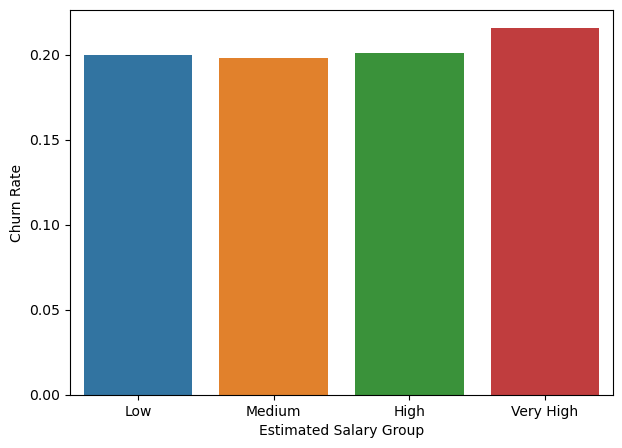

In [51]:
df['SalaryGroup'] = pd.qcut(df['EstimatedSalary'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

salary_churn = df.groupby('SalaryGroup')['Exited'].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x='SalaryGroup', y='Exited', data=salary_churn)
plt.ylabel('Churn Rate')
plt.xlabel('Estimated Salary Group')
plt.show()

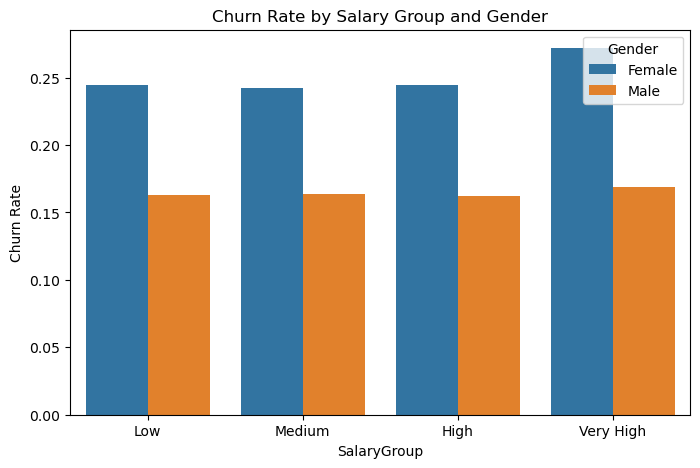

In [52]:
salary_gender_churn = df.groupby(['SalaryGroup', 'Gender'])['Exited'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='SalaryGroup', y='Exited', hue='Gender', data=salary_gender_churn)
plt.title('Churn Rate by Salary Group and Gender')
plt.ylabel('Churn Rate')
plt.show()

## Observation
---
- The salary rate of **female** is **very high** compared to the other gender. 

- The salary rate of **male** is **very low** compared to the other gender.

- As you can see the difference between the salary rate of **female** and **male** is **very high**.

- But the strength of the **Male** is **grater then** the **Female**.
---
- Now we need to more explore our data to visualize the insights of data 

- Let's visualize the relationship between the numerical variables in our data

- we use **Heatmap** to visualize the relationship between the numerical variables in our data

In [53]:
numerical_features_with_target = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr() 

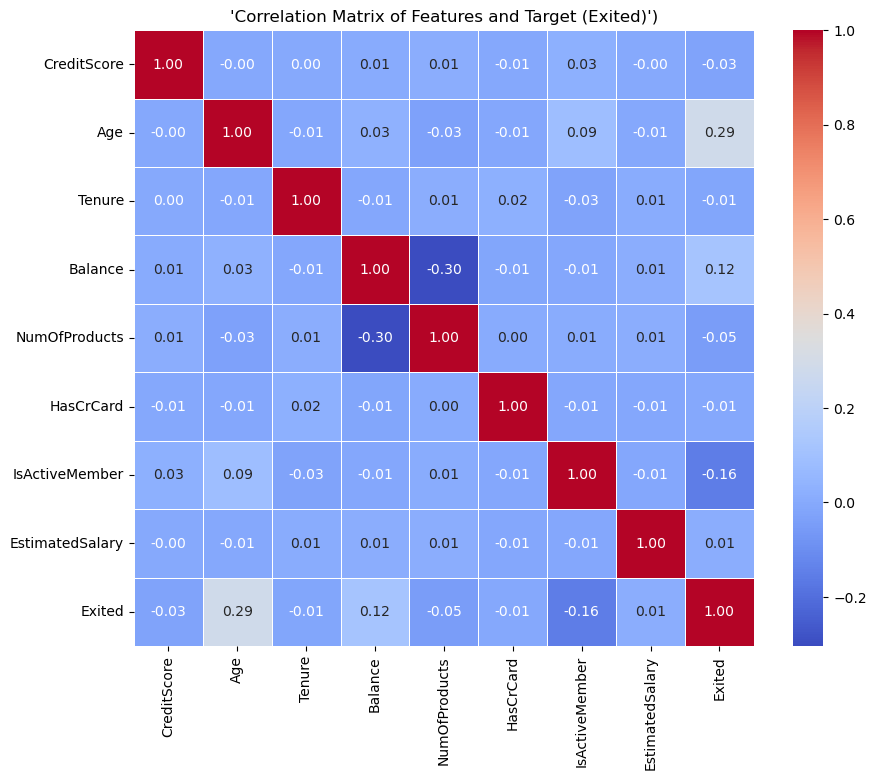

In [54]:
plt.figure(figsize= (10,8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', fmt='.2f', linewidths=0.5)
plt.title("'Correlation Matrix of Features and Target (Exited)')")
plt.show()

## Observation
---
- Age is the only feature that shows a meaningful correlation with the target Exited in this matrix.

- The rest of the features may still be useful in a model, but they don’t show strong linear relationships with Exited.

In [55]:
# sunburst chart
df_sunburst = df.groupby(["Age", "Balance", "Exited"]).size().reset_index(name='counts')

fig11 = px.sunburst(df_sunburst, path=["Age", "Balance", "Exited"], values='counts')
fig11.show()

## Observation
---
- Most of the thing are clear now in our dataset that we have used in our analysis.

- We have seen that the average age of the people in our dataset is around 25 years.
--- 
- Let's **transform** the **categorical** columns into numerical columns using **one-hot encoding** Or **label encoding**.

- This will help us to use the data in our model.

In [56]:
cat_col = ['Geography', 'Gender']
label = LabelEncoder()

for column in cat_col:
    df[column] = label.fit_transform(df[column])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryGroup
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,High
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,High
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,High
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,Medium
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,Medium


In [57]:
X = df.drop('Exited', axis=1,)

X = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [58]:
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("Exited", axis=1)
y = df_encoded["Exited"]


## Observation
---
- Our **categorical** columns are perfectly **transformed** into **numeric**

- And now our dataset good fit for **Machine Learning** algorithms or **Models**

- Let's split the data and train the **logistic model**

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state= 42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

## Observation 
- As you can see our **logistic regression** model trained perfectly on the  train data.

- Now our model is ready to be used for prediction on the test data.
 
- let's see how our model performs on the test data.

In [82]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.788875
Confusion Matrix:
 [[6197  176]
 [1513  114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6373
           1       0.39      0.07      0.12      1627

    accuracy                           0.79      8000
   macro avg       0.60      0.52      0.50      8000
weighted avg       0.72      0.79      0.73      8000



In [83]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [99]:
y_pred = log_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.788875
Confusion Matrix:
 [[6197  176]
 [1513  114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6373
           1       0.39      0.07      0.12      1627

    accuracy                           0.79      8000
   macro avg       0.60      0.52      0.50      8000
weighted avg       0.72      0.79      0.73      8000



In [87]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)  # You can tune hyperparameters
model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5, random_state=42)

In [89]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.83825
Confusion Matrix:
 [[6288   85]
 [1209  418]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      6373
           1       0.83      0.26      0.39      1627

    accuracy                           0.84      8000
   macro avg       0.83      0.62      0.65      8000
weighted avg       0.84      0.84      0.80      8000



## Observation
---
- As you can see i used three type of machine learning model.

- The accuracy of **Decision tree classifier** is **batter** then **logistic Regression** and **linear regression**.

- let's check the confusion matrix of **Decision tree classifier** to see how many of the predictions were correct.

In [96]:
log_precision = precision_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred)

print(f"Precision: {log_precision:.2f}")
print(f"Recall:    {log_recall:.2f}")
print(f"F1 Score:  {log_f1:.2f}")

Precision: 0.83
Recall:    0.26
F1 Score:  0.39


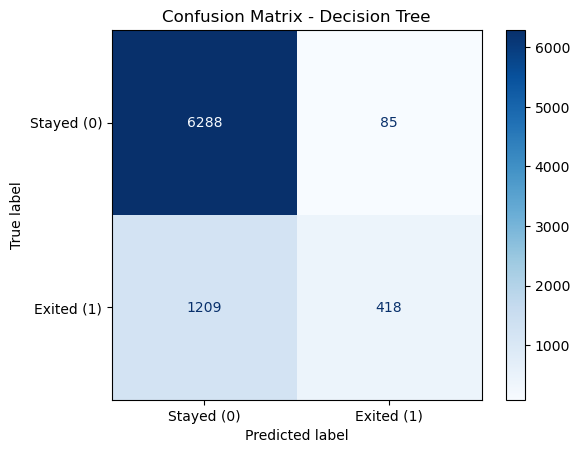

In [97]:
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stayed (0)', 'Exited (1)'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

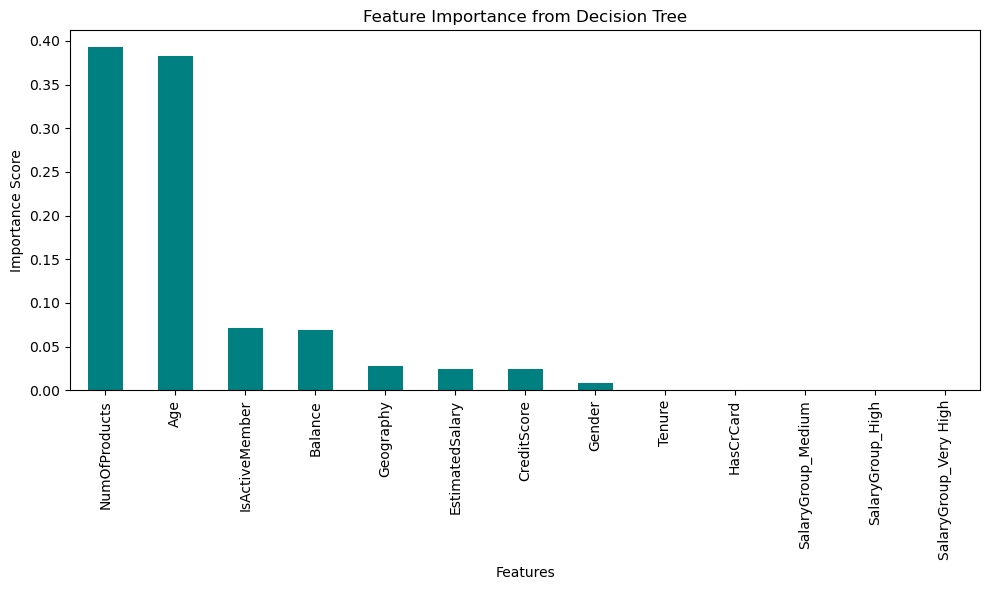

In [100]:
importance = model.feature_importances_

# Map to feature names
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='teal')
plt.title('Feature Importance from Decision Tree')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

## Observation
---
- As you can see the confusion matrix that is show the prediction of our model 

- Feature Importance from Decision Tree chart shows the importance of each feature in the model. 

- The feature importance is calculated based on the **Gini impurity** reduction. 

- The higher the importance, the more the feature **contributes** to the **model's predictions**.

- Now no need to be more exploration of the data because we have already seen the data distribution and the model performance. 
